## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">CAPSTONE PROJECT : NLP - CHATBOT INTERFACE

## <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Domain: Industrial safety. NLP based Chatbot

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Context:
<font color=darkblue>
The database comes from one of the biggest industry in Brazil and in the world. It is an urgent need for industries/companies around the globe to understand why employees still suffer some injuries/accidents in plants. Sometimes they also die in such environment.
</font> 

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Data Description:
<font color=darkblue>
This The database is basically records of accidents from 12 different plants in 03 different countries which every line in the data is an occurrence of an accident.
</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Column Information:
<font color=darkblue>
<b>Data :</b>timestamp or time/date information
<br><b>Countries :</b>which country the accident occurred (anonymised)
<br><b>Local :</b>the city where the manufacturing plant is located (anonymised)
<br><b>Industry sector :</b>which sector the plant belongs to
<br><b>Accident level :</b>from I to VI, it registers how severe was the accident (I means not severe but VI means very severe)
<br><b>Potential Accident Level :</b>Depending on the Accident Level, the database also registers how severe the accident could have been (due to other factors involved in the accident)
<br><b>Genre :</b>if the person is male of female
<br><b>Employee or Third Party :</b>if the injured person is an employee or a third party
<br><b>Critical Risk :</b>some description of the risk involved in the accident
<br><b>Description :</b>Detailed description of how the accident happened
</font> 

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Objective:
<font color=darkblue>
Design a ML/DL based chatbot utility which can help the professionals to highlight the safety risk as per the incident description
</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Import the necessary libraries

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import os
import warnings
warnings.filterwarnings('ignore')


In [2]:
print('Tensorflow Version : ', tf.__version__)
print('Numpy Version : ', np.__version__)
print('Pandas Version : ', pd.__version__)
print('Matplotlib Version : ', matplotlib.__version__)


Tensorflow Version :  2.4.0
Numpy Version :  1.19.4
Pandas Version :  1.1.5
Matplotlib Version :  3.2.2


### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Mount Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Change current working directory to project folder

In [4]:
#file_path = "/content/drive/MyDrive/AIML/Projects/"
file_path = ""
zip_file = "archive.zip"


### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Extract the zip file :
<font color=darkblue>
Extract Aligned Face Dataset from Pinterest.zip
<ul>
</ul>
</font>

In [5]:
from zipfile import ZipFile
with ZipFile(file_path + zip_file, 'r') as zip:
  zip.extractall()

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Load Dataset :
<font color=darkblue>
</font>

In [2]:
df_accidents = pd.read_csv("IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv")

In [3]:
df_accidents.shape

(425, 11)

In [4]:
df_accidents.head(10)

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...
5,5,2016-01-12 00:00:00,Country_02,Local_05,Metals,I,III,Male,Third Party (Remote),Pressurized Systems,During the unloading operation of the ustulado...
6,6,2016-01-16 00:00:00,Country_02,Local_05,Metals,I,III,Male,Employee,Fall prevention (same level),The collaborator reports that he was on street...
7,7,2016-01-17 00:00:00,Country_01,Local_04,Mining,I,III,Male,Third Party,Pressed,"At approximately 04:50 p.m., when the mechanic..."
8,8,2016-01-19 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Third Party (Remote),Others,Employee was sitting in the resting area at le...
9,9,2016-01-26 00:00:00,Country_01,Local_06,Metals,I,II,Male,Third Party,Chemical substances,At the moment the forklift operator went to ma...


### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Data Cleansing :
<font color=darkblue>
</font>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Checking presence of Missing Values :
<font color=darkblue>
</font>

In [5]:
df_accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                425 non-null    int64 
 1   Data                      425 non-null    object
 2   Countries                 425 non-null    object
 3   Local                     425 non-null    object
 4   Industry Sector           425 non-null    object
 5   Accident Level            425 non-null    object
 6   Potential Accident Level  425 non-null    object
 7   Genre                     425 non-null    object
 8   Employee or Third Party   425 non-null    object
 9   Critical Risk             425 non-null    object
 10  Description               425 non-null    object
dtypes: int64(1), object(10)
memory usage: 36.6+ KB


In [6]:
df_accidents.isna().sum()

Unnamed: 0                  0
Data                        0
Countries                   0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Genre                       0
Employee or Third Party     0
Critical Risk               0
Description                 0
dtype: int64

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Drop Column :
<font color=darkblue>
</font>

In [7]:
df_accidents.drop('Unnamed: 0', axis=1, inplace=True)

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Rename Columns :
<font color=darkblue>
</font>

In [8]:
df_accidents.rename(columns={'Data':'Date', 'Countries':'Country', 'Genre':'Gender', 
                             'Employee or Third Party':'Employee Type'}, inplace=True)

In [9]:
df_accidents.head()

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee Type,Critical Risk,Description
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Unique Check :
<font color=darkblue>
</font>

In [10]:
df_accidents.nunique()

Date                        287
Country                       3
Local                        12
Industry Sector               3
Accident Level                5
Potential Accident Level      6
Gender                        2
Employee Type                 3
Critical Risk                33
Description                 411
dtype: int64

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Data Preprocessing :
<font color=darkblue>
</font>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Add Columns on Date attribute :
<font color=darkblue>
</font>

In [11]:
df_accidents['Date'] = pd.to_datetime(df_accidents['Date'])
df_accidents['Year'] = df_accidents['Date'].apply(lambda x : x.year)
df_accidents['Month'] = df_accidents['Date'].apply(lambda x : x.month)
df_accidents['Day'] = df_accidents['Date'].apply(lambda x : x.day)
df_accidents['Weekday'] = df_accidents['Date'].apply(lambda x : x.day_name())
df_accidents['WeekofYear'] = df_accidents['Date'].apply(lambda x : x.weekofyear)
df_accidents['MonthName'] = df_accidents['Date'].apply(lambda x : x.month_name())

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Add Column on Season of year :
<font color=darkblue>
<ui>
<li><b>Winter :</b> December, January, February</li>
<li><b>Spring :</b> March, April, May</li>
<li><b>Summer :</b> June, July, August</li>
<li><b>Autumn :</b> September, October, November</li>
</font>

In [12]:
def seasonofyear(x):
    if x in [12, 1, 2]:
        season = 'Winter'
    elif x in [3, 4, 5]:
        season = 'Spring'
    elif x in [6, 7, 8]:
        season = 'Summer'
    elif x in [9, 10, 11]:
        season = 'Autumn'
    return season

df_accidents['Season'] = df_accidents['Month'].apply(seasonofyear)

In [13]:
df_accidents.head()

,Date,Country,Local,Industry Sector,Accident Level,Potential Accident Level,Gender,Employee Type,Critical Risk,Description,Year,Month,Day,Weekday,WeekofYear,MonthName,Season
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...,2016,1,1,Friday,53,January,Winter
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...,2016,1,2,Saturday,53,January,Winter
2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...,2016,1,6,Wednesday,1,January,Winter
3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...,2016,1,8,Friday,1,January,Winter
4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...,2016,1,10,Sunday,1,January,Winter


In [14]:
df_accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      425 non-null    datetime64[ns]
 1   Country                   425 non-null    object        
 2   Local                     425 non-null    object        
 3   Industry Sector           425 non-null    object        
 4   Accident Level            425 non-null    object        
 5   Potential Accident Level  425 non-null    object        
 6   Gender                    425 non-null    object        
 7   Employee Type             425 non-null    object        
 8   Critical Risk             425 non-null    object        
 9   Description               425 non-null    object        
 10  Year                      425 non-null    int64         
 11  Month                     425 non-null    int64         
 12  Day                   

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">NLP Preprocessing :
<font color=darkblue>
</font>

### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">EDA :
<font color=darkblue>
</font>

In [126]:
# function for distribution, frequency plot
def UnivariatePlot(aCol):
    aBar = df_accidents[aCol]
    aSeries = df_accidents.groupby(aCol)['Accident Level'].count()
    aLabel = aSeries.keys()  #df_accidents[aCol]
    aUnique = df_accidents[aCol].nunique()
    
    plt.figure(figsize=(18,6))
    
    # bar char showing count
    plt.subplot(1, 2, 1)
    plt.title(aCol + ' Count', fontsize=14)
    plt.xlabel(aCol, fontsize=13)
    plt.ylabel('Total number of Accidents', fontsize=13)
    sns.countplot(aBar, data=df_accidents)
    plt.tick_params(labelsize=13)
    
    # pie chart showing percentage
    plt.subplot(1, 2, 2)
    plt.title(aCol + ' Percentage', fontsize=14)
    plt.pie(aSeries, autopct="%1.1f%%", explode=[0.04]*aUnique, labels=aLabel, pctdistance=0.5, shadow=True, startangle=90)
    plt.axis('equal')

    plt.show()


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Analysis by Country :
<font color=darkblue>
</font>

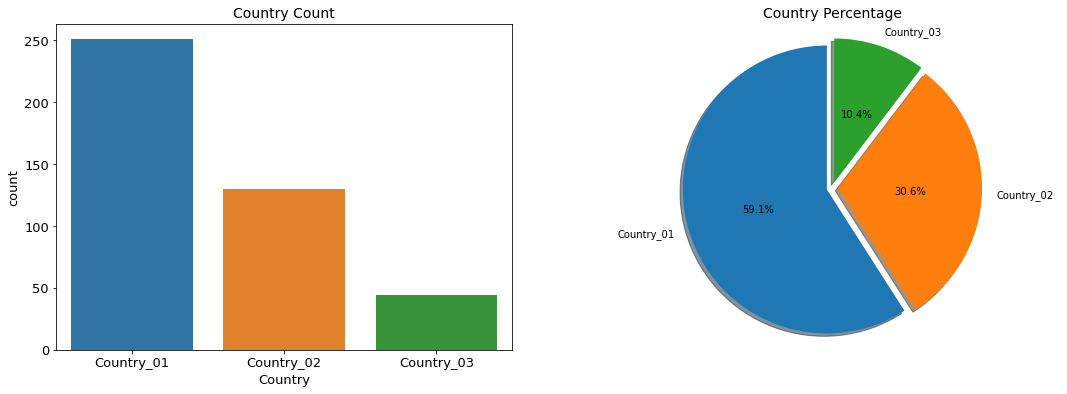

In [127]:
# plot on Country column
UnivariatePlot('Country')


##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
</font>
<br>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Analysis by Gender :
<font color=darkblue>
</font>

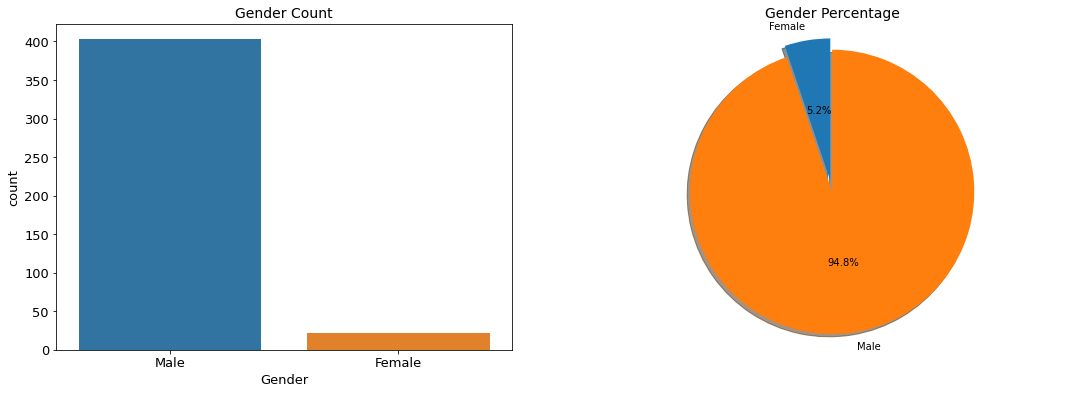

In [128]:
# plot on Gender column
UnivariatePlot('Gender')

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
</font>
<br>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Analysis by Employee Type :
<font color=darkblue>
</font>

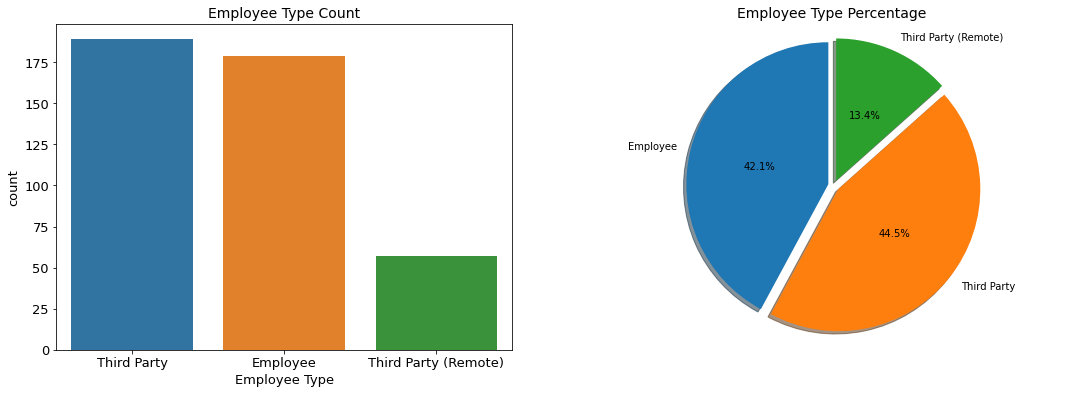

In [129]:
# plot on Employee Type column
UnivariatePlot('Employee Type')

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
</font>
<br>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Analysis by Local :
<font color=darkblue>
</font>

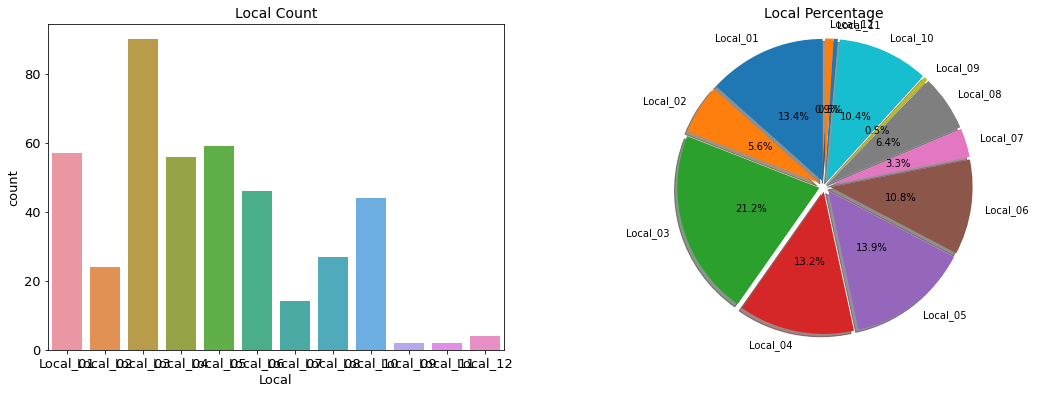

In [130]:
# plot on Local column
UnivariatePlot('Local')

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
</font>
<br>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Analysis by Industry Sector :
<font color=darkblue>
</font>

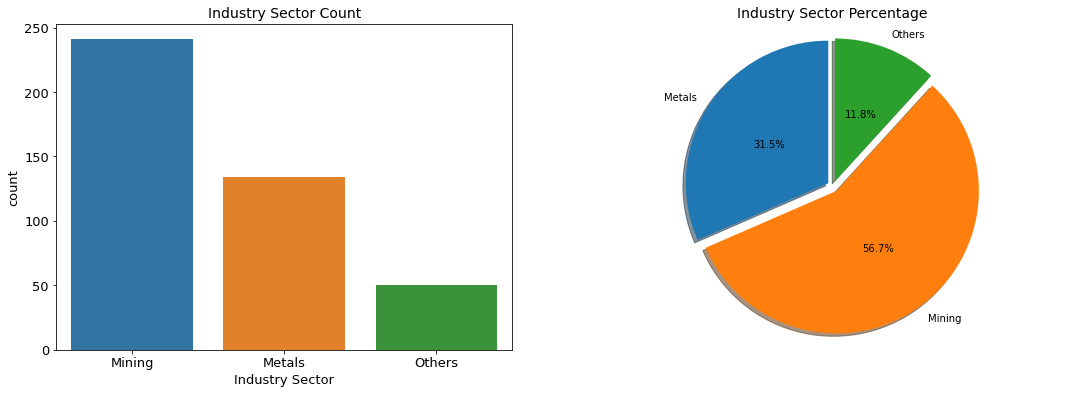

In [131]:
# plot on Industry Sector column
UnivariatePlot('Industry Sector')

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
</font>
<br>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Analysis by Accident Level :
<font color=darkblue>
</font>

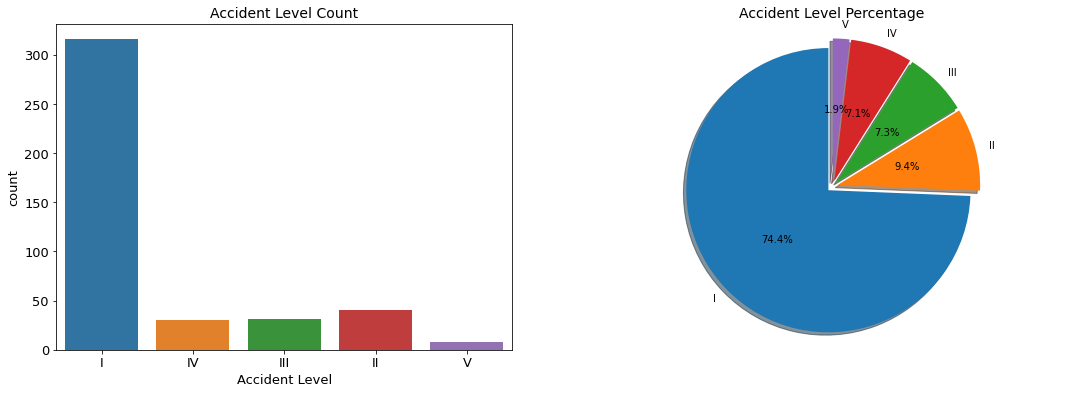

In [132]:
# plot on Accident Level column
UnivariatePlot('Accident Level')

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
</font>
<br>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Analysis by Potential Accident Level :
<font color=darkblue>
</font>

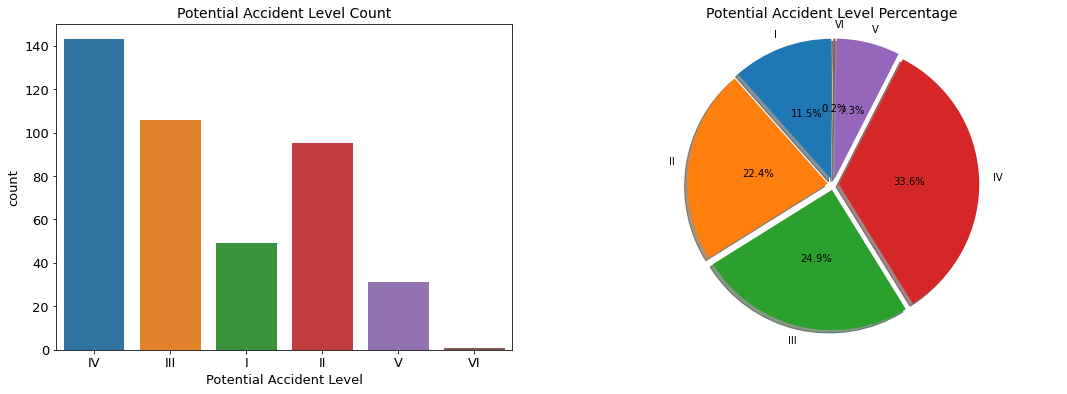

In [134]:
# plot on Potential Accident Level column
UnivariatePlot('Potential Accident Level')

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
</font>
<br>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Analysis by Month :
<font color=darkblue>
</font>

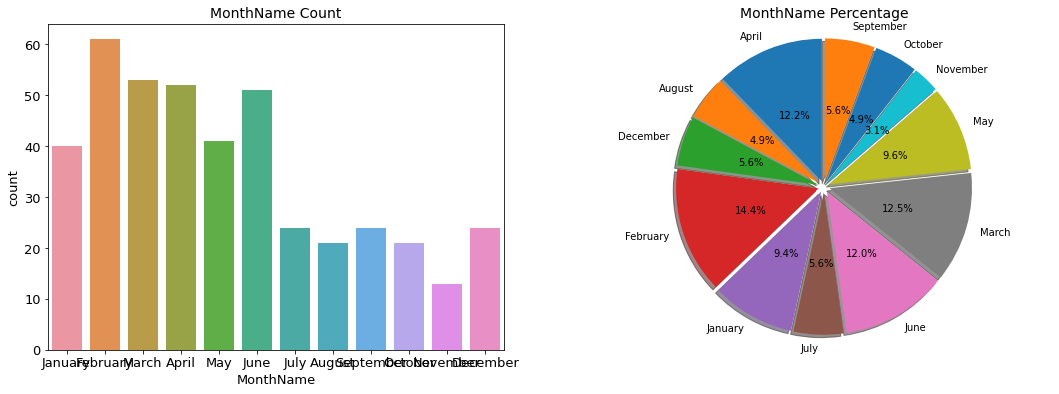

In [135]:
# plot on Month Level column
UnivariatePlot('MonthName')

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
</font>
<br>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Analysis by Weekday :
<font color=darkblue>
</font>

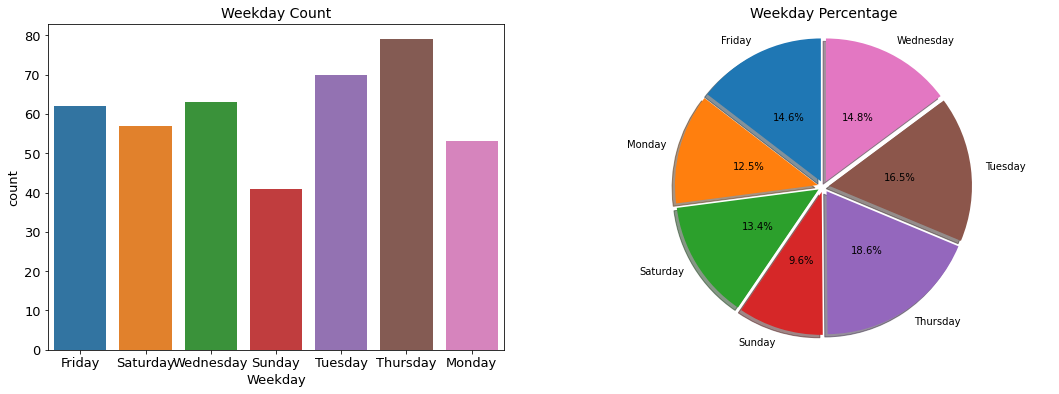

In [138]:
# plot on Week Day Level column
UnivariatePlot('Weekday')

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
</font>
<br>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Analysis by Season :
<font color=darkblue>
</font>

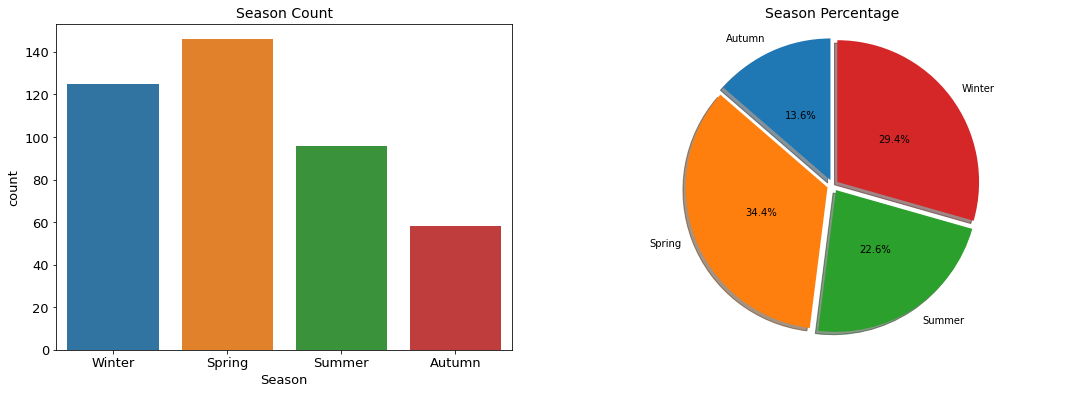

In [139]:
# plot on Season Level column
UnivariatePlot('Season')

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
</font>
<br>

In [140]:
# Multivariate analysis on Accident Level/Potential Accident levels
def MultivariatePlot(aCol):
    fig = plt.figure(figsize = (15, 7.2))
    ax = fig.add_subplot(121)
    sns.countplot(x = aCol, data = df_accidents, ax = ax, orient = 'v',
                  hue = 'Accident Level').set_title(aCol.capitalize() +' count plot by Accident Level', 
                                                                      fontsize = 13)
    plt.legend(labels = df_accidents['Accident Level'].unique())
    plt.xticks(rotation = 90)
    
    ax = fig.add_subplot(122)
    sns.countplot(x = aCol, data = df_accidents, ax = ax, orient = 'v', 
                  hue = 'Potential Accident Level').set_title(aCol.capitalize() +' count plot by Potential Accident Level', 
                                                                      fontsize = 13)
    plt.legend(labels = df_accidents['Potential Accident Level'].unique())
    plt.xticks(rotation = 90)
    return plt.show()


#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Analysis by Country on Accident Level / Potential Accident Level:
<font color=darkblue>
</font>

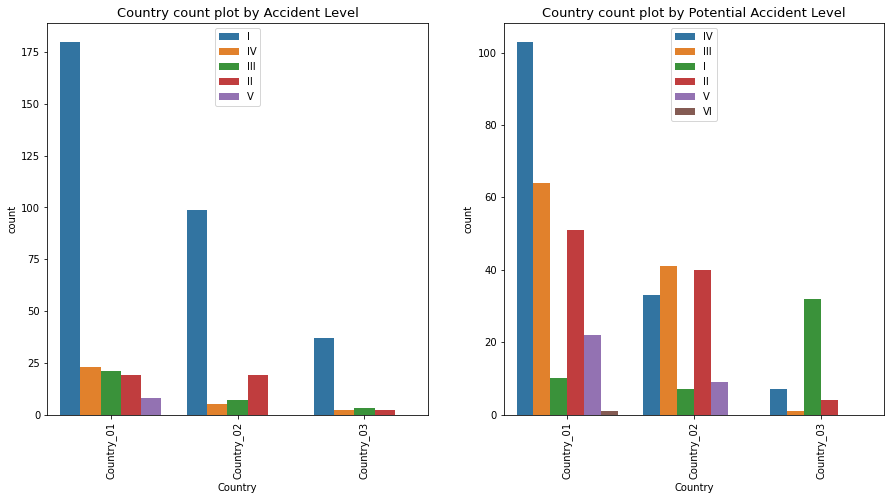

In [141]:
# plot on Country column
MultivariatePlot('Country')

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
</font>
<br>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Analysis by Gender on Accident Level / Potential Accident Level:
<font color=darkblue>
</font>

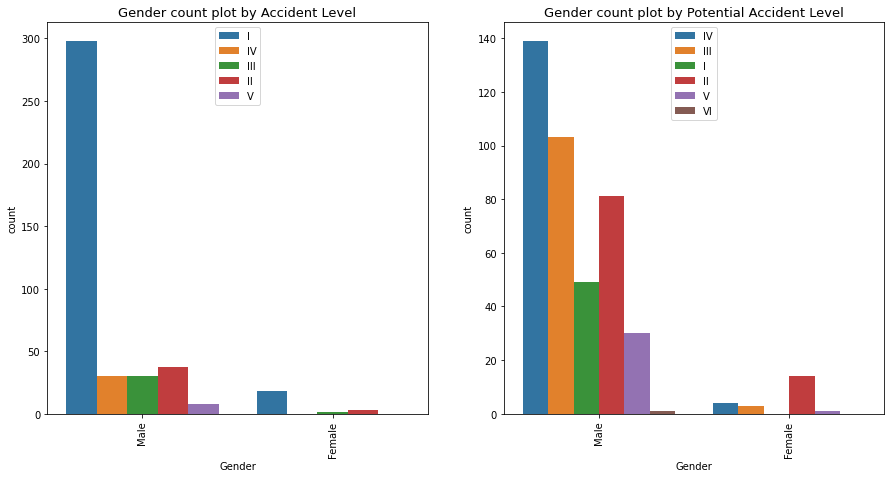

In [142]:
# plot on Gender column
MultivariatePlot('Gender')

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
</font>
<br>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Analysis by Industry Sector on Accident Level / Potential Accident Level:
<font color=darkblue>
</font>

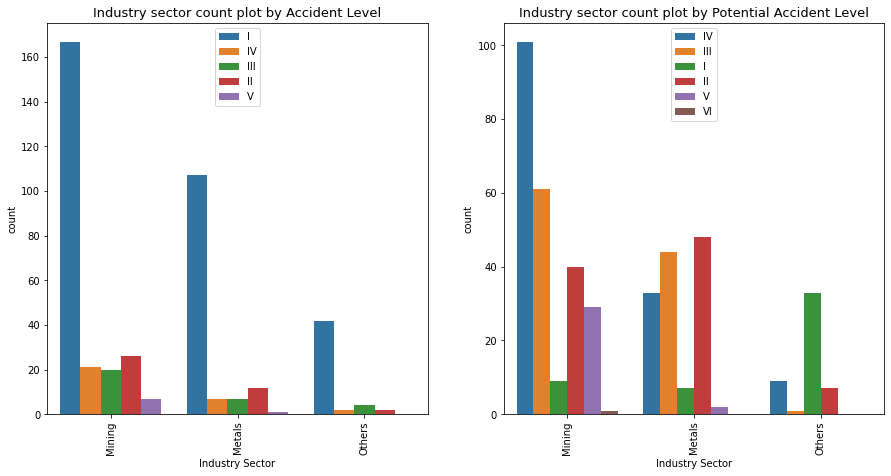

In [143]:
# plot on Industry Sector column
MultivariatePlot('Industry Sector')

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
</font>
<br>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Analysis by Employee Type on Accident Level / Potential Accident Level:
<font color=darkblue>
</font>

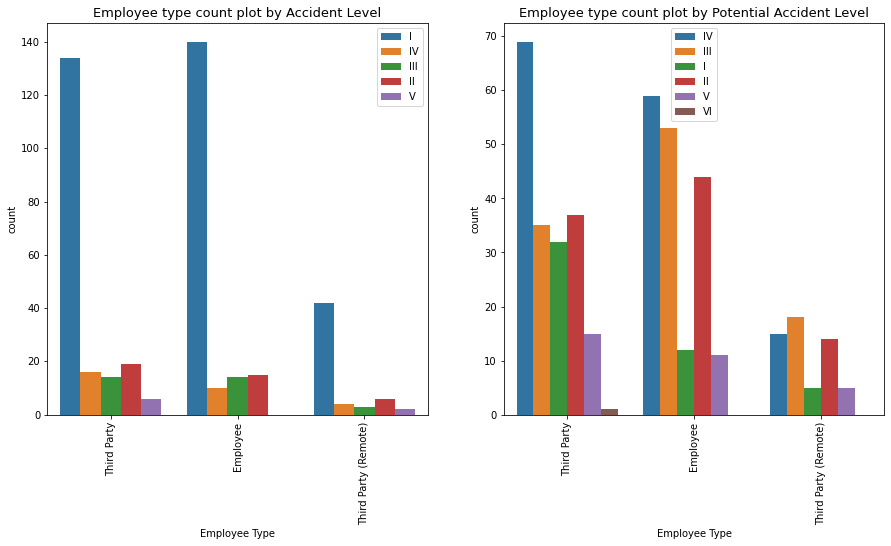

In [144]:
# plot on Employee Type column
MultivariatePlot('Employee Type')

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
</font>
<br>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Analysis by Month on Accident Level / Potential Accident Level:
<font color=darkblue>
</font>

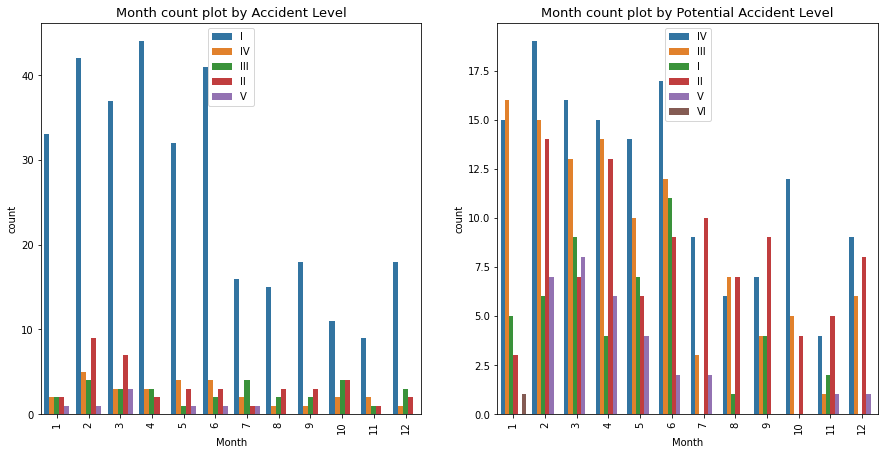

In [145]:
# plot on Month column
MultivariatePlot('Month')

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
</font>
<br>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Analysis by Season on Accident Level / Potential Accident Level:
<font color=darkblue>
</font>

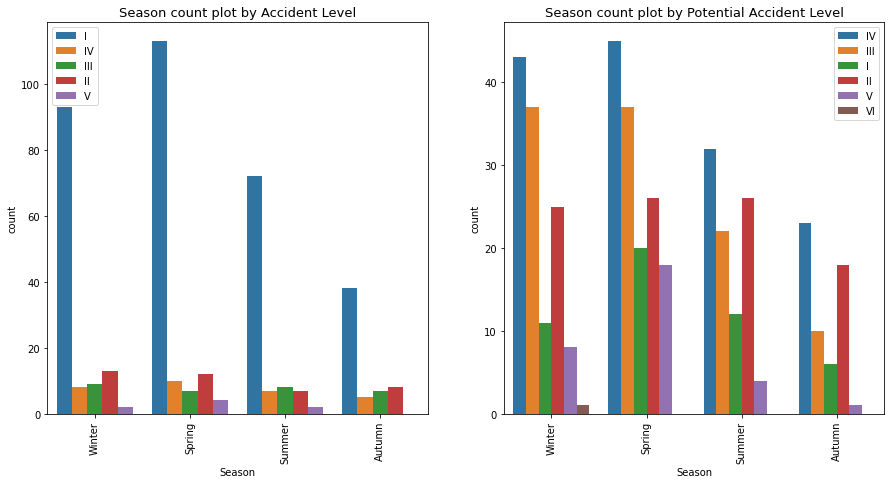

In [146]:
# plot on Season column
MultivariatePlot('Season')

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
</font>
<br>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Analysis by Weekday on Accident Level / Potential Accident Level:
<font color=darkblue>
</font>

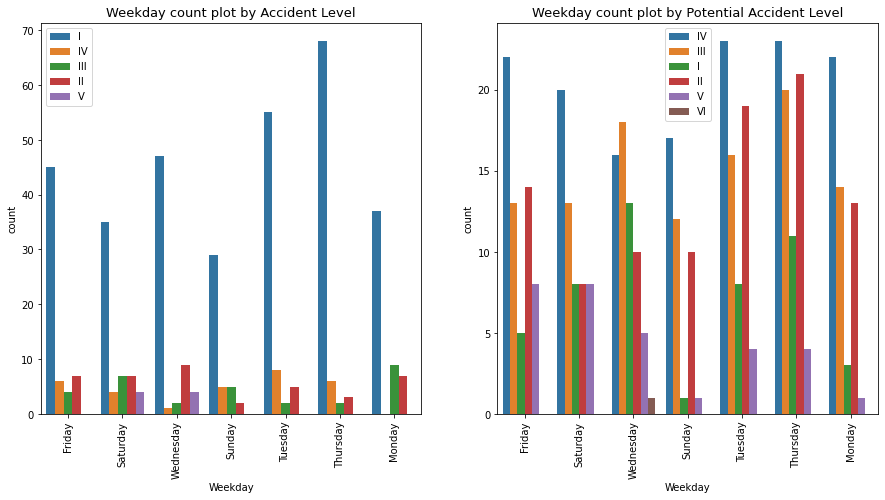

In [147]:
# plot on Weekday column
MultivariatePlot('Weekday')

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
</font>
<br>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Analysis by Country on Employee Type:
<font color=darkblue>
</font>

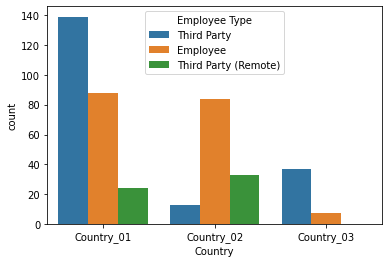

In [148]:
sns.countplot(x="Country", data=df_accidents, hue="Employee Type")

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
</font>
<br>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Analysis by Country on Industry Sector:
<font color=darkblue>
</font>

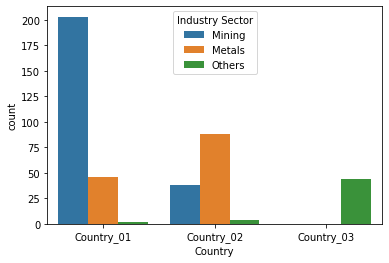

In [149]:
sns.countplot(x="Country", data=df_accidents, hue="Industry Sector")

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
</font>
<br>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Analysis by Country on Gender:
<font color=darkblue>
</font>

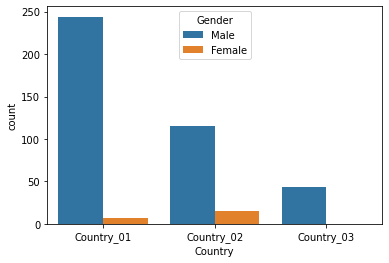

In [150]:
sns.countplot(x="Country", data=df_accidents, hue="Gender")

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
</font>
<br>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Analysis by Employee Type on Gender:
<font color=darkblue>
</font>

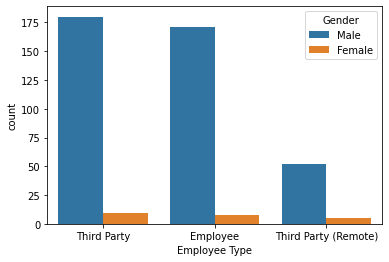

In [151]:
sns.countplot(x="Employee Type", data=df_accidents, hue="Gender")

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
</font>
<br>

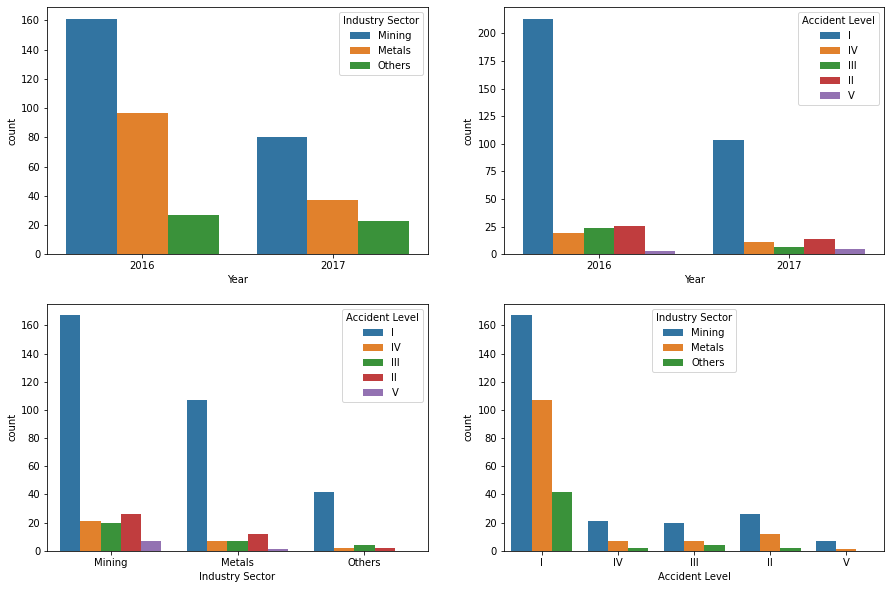

In [152]:
fig,axs = plt.subplots(nrows=2,ncols=2,figsize=(15,10))
sns.countplot(x=df_accidents['Year'], hue='Industry Sector', data=df_accidents,ax=axs[0][0])
sns.countplot(x=df_accidents['Year'], hue='Accident Level', data=df_accidents,ax=axs[0][1])
sns.countplot(x=df_accidents['Industry Sector'], hue='Accident Level', data=df_accidents,ax=axs[1][0])
sns.countplot(x=df_accidents['Accident Level'], hue='Industry Sector', data=df_accidents,ax=axs[1][1])

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Observation :
<font color=darkblue>
</font>
<br>

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Analysis on Description:
<font color=darkblue>
</font>

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Number of Words in each Description (row):
<font color=darkblue>
</font>

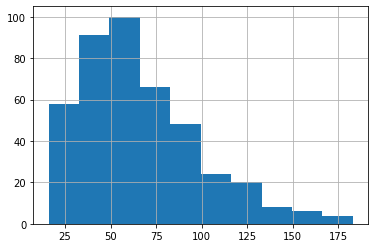

In [153]:
df_accidents['Description'].str.split().map(lambda x: len(x)).hist()

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Number of Characters in each Description (row):
<font color=darkblue>
</font>

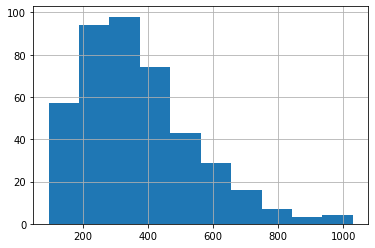

In [154]:
df_accidents['Description'].str.len().hist()

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Average Word length:
<font color=darkblue>
</font>

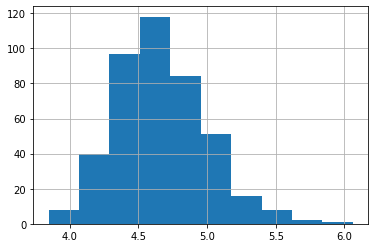

In [155]:
df_accidents['Description'].str.split().apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()

##### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Stopword Average:
<font color=darkblue>
</font>

In [156]:
from nltk.corpus import stopwords

def plot_top_stopwords(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)


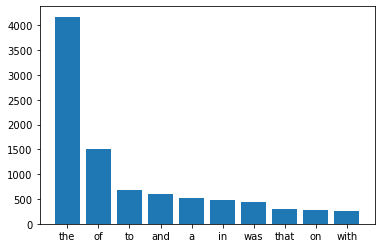

In [158]:
plot_top_stopwords(df_accidents['Description'])    

#### <span style="font-family: Arial; font-weight:bold;font-size:1.25em;color:#00b3e5;">Conclusion :
<font color=darkblue>
</font>